### Homework 8

이번 과제에서는 이분산 모형의 추정과 리스크 관리와 관련된 고급 통계 기법들을 실습해보도록 한다

#### 1. Data Import

yfinance library를 이용하여 2020년 1월 1일부터 2023년 7월 31일까지의 IBM 기업의 주가를 import 하여 log defference 형태로 수정하라

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

start_date = '2020-01-01'
end_date = '2023-08-01'

ibm = yf.download('IBM', start = start_date, end = end_date)
ibm

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,129.063095,129.942642,128.843216,129.464630,107.512405,3293436
2020-01-03,127.695984,128.929260,127.686424,128.432129,106.654976,2482890
2020-01-06,127.552582,128.336517,127.342255,128.202682,106.464439,2537073
2020-01-07,127.810707,129.024857,127.533463,128.288712,106.535881,3232977
2020-01-08,128.594650,129.885284,128.030594,129.359467,107.425087,4545916
...,...,...,...,...,...,...
2023-07-25,139.419998,140.429993,139.039993,140.330002,138.733490,3770800
2023-07-26,140.440002,141.250000,139.880005,141.070007,139.465073,4046400
2023-07-27,142.300003,143.380005,141.899994,142.970001,141.343445,6331600


In [2]:
ret = np.log(ibm.Close / ibm.Close.shift(1)).dropna()
ret

Date
2020-01-03   -0.008007
2020-01-06   -0.001788
2020-01-07    0.000671
2020-01-08    0.008312
2020-01-09    0.010513
                ...   
2023-07-25    0.005646
2023-07-26    0.005259
2023-07-27    0.013379
2023-07-28    0.003352
2023-07-31    0.005076
Name: Close, Length: 899, dtype: float64

#### 2. GARCH models

**2.1 GARCH model**

$\mathrm{GARCH}$ 모형은 다음과 같이 추정된다

$$r_t = \mu + a_t$$
$$a_t = \sigma_t \epsilon_t$$
$$\sigma_t^2 = \alpha_0 + \sum_{i=1}^m \alpha_i a_{t-1}^2 + \sum_{j=1}^s \beta_j \sigma_{t-j}^2$$

IBM 수익률 벡터를 활용하여 적절한 order를 선택해 $\mathrm{GARCH}$ model을 추정하고, 추정된 변동성을 plotting하여라

In [3]:
import arch

garch_model1 = arch.arch_model(ret, vol = 'GARCH', p = 1, q = 1)
result1 = garch_model1.fit()
print(result1.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14940286.438950352
Iteration:      2,   Func. Count:     18,   Neg. LLF: 105680784280654.92
Iteration:      3,   Func. Count:     29,   Neg. LLF: 15998917.267561179
Iteration:      4,   Func. Count:     41,   Neg. LLF: -2426.44491370294
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2426.4449163168347
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2426.44
Distribution:                  Normal   AIC:                          -4844.89
Method:            Maximum Likelihood   BIC:                          -4825.68
                          

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [4]:
garch_model2 = arch.arch_model(ret, vol = 'GARCH', p = 1, q = 2)
result2 = garch_model2.fit()
print(result2.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 6463855.109293972
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1056186.230872824
Iteration:      3,   Func. Count:     33,   Neg. LLF: 4266.175343584766
Iteration:      4,   Func. Count:     43,   Neg. LLF: 224947.22124398634
Iteration:      5,   Func. Count:     55,   Neg. LLF: 29581700215.83891
Iteration:      6,   Func. Count:     68,   Neg. LLF: 79633.69661842259
Iteration:      7,   Func. Count:     80,   Neg. LLF: 10265343.9365596
Iteration:      8,   Func. Count:     93,   Neg. LLF: 702759.297926867
Iteration:      9,   Func. Count:    106,   Neg. LLF: 25762340.0854041
Iteration:     10,   Func. Count:    120,   Neg. LLF: 174059726.79218253
Iteration:     11,   Func. Count:    134,   Neg. LLF: 77565.18835155285
Iteration:     12,   Func. Count:    145,   Neg. LLF: 52995738.211539164
Iteration:     13,   Func. Count:    158,   Neg. LLF: 1947673.486385889
Iteration:     14,   Func. Count:    172,   Neg. LLF: 2048921541

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [5]:
garch_model3 = arch.arch_model(ret, vol = 'GARCH', p = 2, q = 1)
result3 = garch_model3.fit()
print(result3.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 15553091.485530043
Iteration:      2,   Func. Count:     19,   Neg. LLF: -2425.961120701987
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2425.961123519657
            Iterations: 6
            Function evaluations: 19
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2425.96
Distribution:                  Normal   AIC:                          -4841.92
Method:            Maximum Likelihood   BIC:                          -4817.92
                                        No. Observations:                  899
Date:                Wed, Oct 04 2023   Df Residuals:                      898
Time:         

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


$\mathrm{GARCH}(1,2)$모형이 가장 잘 설명하므로, $\mathrm{GARCH}(1,2)$을 최종 모형으로 선정한다

Text(0.5, 1.0, 'Conditional Volatility')

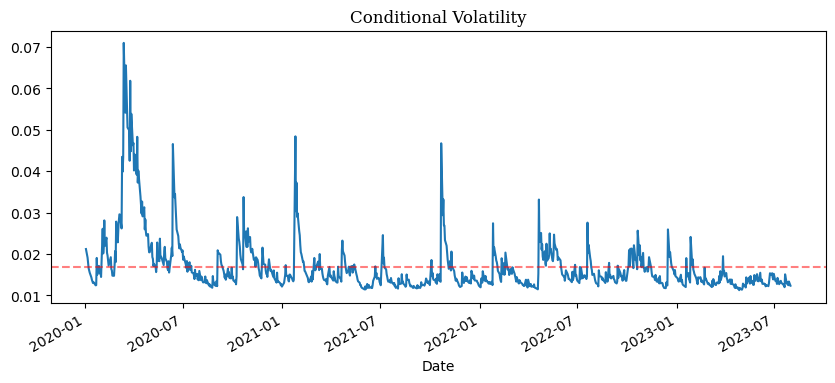

In [6]:
import matplotlib.pyplot as plt
result2.conditional_volatility.plot(figsize = (10, 4))
plt.axhline(result2.conditional_volatility.mean(),
            color = 'red', linestyle = '--', alpha = 0.5)
plt.title('Conditional Volatility', fontfamily = 'Serif', fontsize = 12)

`conditional_volatility` 속성을 통해 추정된 변동성을 추출할 수 있다

**2.2 GARCH-Mean model**

$\mathrm{GARCH}(1,1)\mathrm{-M}$모형은 다음과 같이 쓸 수 있다

$$r_t = \mu + c \sigma_t^2 + a_t$$
$$a_t = \sigma_t \epsilon_t$$
$$\sigma_t^2 = \alpha_0 + \alpha_1a_{t-1}^2 + \beta_1 \sigma_{t-1}^2$$

이는 $r_t$에 대해 상수항이 있다고 가정하여 추정하는 모형이다. 한편, python에서는 arch library의 arch_model 함수에서 parameter `mean = Constant`로 지정하여 추정할 수 있다

IBM 수익률 벡터에 대해서 $\mathrm{GARCH}(1,1)\mathrm{-M}$모형을 추정하라. 추정된 변동성에 대해 적절한 방법으로 plotting하여라. **2.1번**의 추정된 결과와 어떤 차이가 있는가?. IBM 주가에 대해서 $\mathrm{GARCH}(1,1)\mathrm{-M}$ 모형은 유의한가?

In [7]:
garchm = arch.arch_model(ret, vol = 'GARCH', p = 1, q = 1, mean = 'Constant')
res_garchm = garchm.fit()
print(res_garchm.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14940286.438950352
Iteration:      2,   Func. Count:     18,   Neg. LLF: 105680784280654.92
Iteration:      3,   Func. Count:     29,   Neg. LLF: 15998917.267561179
Iteration:      4,   Func. Count:     41,   Neg. LLF: -2426.44491370294
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2426.4449163168347
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2426.44
Distribution:                  Normal   AIC:                          -4844.89
Method:            Maximum Likelihood   BIC:                          -4825.68
                          

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Text(0.5, 1.0, 'Conditional Volatility')

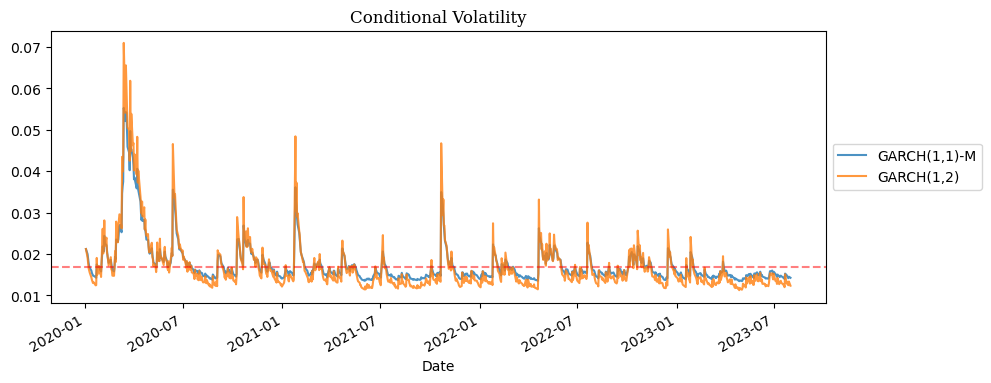

In [8]:
res_garchm.conditional_volatility.plot(figsize = (10, 4), alpha = 0.8, label = 'GARCH(1,1)-M')
result2.conditional_volatility.plot(figsize = (10, 4), alpha = 0.8, label = 'GARCH(1,2)')
plt.axhline(result2.conditional_volatility.mean(),
            color = 'red', linestyle = '--', alpha = 0.5)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Conditional Volatility', fontfamily = 'Serif', fontsize = 12)

추정치에 차이가 존재한다. $\mathrm{GARCH}(1,1)\mathrm{-M}$모형은 IBM 주가에 대해 유의하다

**2.3 Exponential GARCH model**

$\mathrm{GARCH}$모형이 금융 시계열에 쓰였을 때 나타나는 단점을 최소화하기 위해서 exponential $\mathrm{GARCH(EGARCH)}$모형을 제안하였다. 좋은 뉴스와 나쁜 뉴스 즉, 음의 충격과 양의 충격에 비대칭적 효과를 고려하여 weight를 조정하였다

$\mathrm{EGARCH}$ 모형은 다음과 같이 나타낼 수 있다

$$r_t = \mu + a_t$$
$$a_t = \sigma_t \epsilon_t$$
$$\ln(\sigma_t^2) = \alpha_0 + \frac{1 +\beta_1 B + \cdots + \beta_{s-1}B^{s-1}}{1 - \alpha_1B - \cdots - \alpha_m B^m}g(\epsilon_{t-1})$$

$$g(\epsilon_t) = \begin{cases}
(\theta + \gamma) \epsilon_t - \gamma E(|\epsilon_t|) ~~~~~ & \mbox{if } \epsilon_t \geq 0\\
(\theta - \gamma) \epsilon_t - \gamma E(|\epsilon_t|) ~~~~~ & \mbox{if } \epsilon_t < 0
\end{cases}$$

한편, python에서는 arch library의 arch_model 함수에서 parameter `vol = EGARCH`로 지정하여 추정할 수 있다

IBM 수익률 벡터에 대해서 $\mathrm{EGARCH}(1,1)$모형을 추정하라. 추정된 변동성에 대해 적절한 방법으로 plotting하여라. **2.2번**의 추정된 결과와 어떤 차이가 있는가?. IBM 주가에 대해서 $\mathrm{EGARCH}(1,1)$ 모형은 유의한가?

In [9]:
egarch = arch.arch_model(ret, vol = 'EGARCH', p = 1, q = 1)
res_egarch = egarch.fit()
print(res_egarch.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1061763178615776.2
Iteration:      2,   Func. Count:     18,   Neg. LLF: 335119703.71597725
Iteration:      3,   Func. Count:     27,   Neg. LLF: 332734015.14006025
Iteration:      4,   Func. Count:     36,   Neg. LLF: -2409.646443249957
Iteration:      5,   Func. Count:     42,   Neg. LLF: -2427.7225963715628
Iteration:      6,   Func. Count:     48,   Neg. LLF: -2429.4572290842857
Iteration:      7,   Func. Count:     53,   Neg. LLF: -2429.4697487591693
Iteration:      8,   Func. Count:     58,   Neg. LLF: -2429.4703131297492
Iteration:      9,   Func. Count:     63,   Neg. LLF: -2429.4703273194245
Iteration:     10,   Func. Count:     67,   Neg. LLF: -2429.470327320812
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2429.4703273194245
            Iterations: 10
            Function evaluations: 67
            Gradient evaluations: 10
                     Constant Mean - EGARCH Model Resu

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


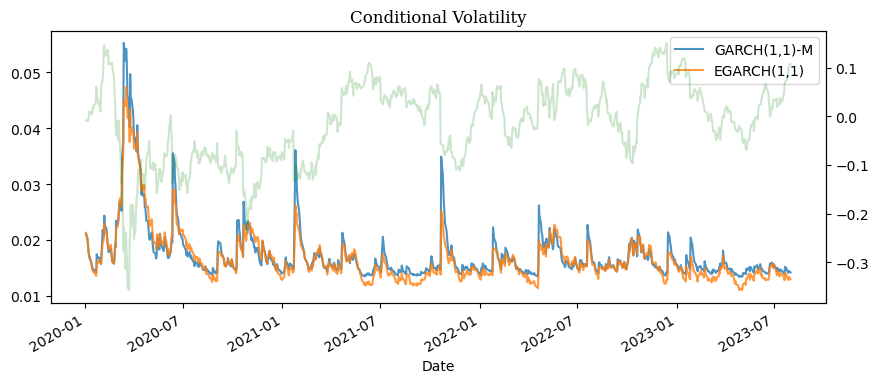

In [10]:
fig, ax = plt.subplots(figsize = (10, 4))
ret.cumsum().plot(secondary_y = True, c = 'g', alpha = 0.2, label = 'Return', ax = ax)
res_garchm.conditional_volatility.plot(alpha = 0.8, label = 'GARCH(1,1)-M', ax = ax)
res_egarch.conditional_volatility.plot(alpha = 0.8, label = 'EGARCH(1,1)', ax = ax)
ax.legend()
plt.title('Conditional Volatility', fontfamily = 'Serif', fontsize = 12)
plt.show()

$\mathrm{EGARCH}(1,1)$모형이 $\mathrm{GARCH}(1,1)\mathrm{-M}$모형에 비해 음의 충격, 양의 충격의 가중치가 조정되어 추정된다. 추정 결과 변동성에 대한 계수들이 모두 유의하므로, $\mathrm{EGARCH}(1,1)$모형은 유의하다

#### 3. Value at Risk

재무회계에 있어서 위험은 크게 시장위험, 유동성위험, 신용위험, 운영위험으로 나뉘며, 이중 시장위험을 측정하는데 보편적으로 사용하는 모형은 Value at Risk$\mathrm{(VaR)}$이다. $\mathrm{VaR}$의 측정방법은 다음 네 가지로 분류할 수 있다
1. Econometrics Approach
2. Risk Metrics
3. Quantile Estimation
4. Extreme Value Approach

Econometrics Approach는 $\mathrm{GARCH}$등 변동성 추정 방법을 통해 구하는 방법이며, 다음과 같이 추정한다

$$\mathrm{VaR} = \sigma_t \times z_a$$

여기서 $\sigma_t$는 $\mathrm{GARCH}$모형을 통해 추정된 변동성이며, $z_a$는 한쪽꼬리검정의 신뢰상수를 의미한다. 예를들어, 95%의 신뢰상수는 1.645이며, 99%의 신뢰상수는 2.33이다

**Example 2**에서 추정한 세 가지 종류의 $\mathrm{GARCH}$모형에 대해 신뢰수준 95%에서의 일별 $\mathrm{VaR}$을 추정하라. 세 모형의 $\mathrm{VaR}$ 추정값에는 어떤 차이가 있는가?

In [11]:
garch_var = result2.conditional_volatility * 1.645
garchm_var = res_garchm.conditional_volatility * 1.645
egarch_var = res_egarch.conditional_volatility * 1.645

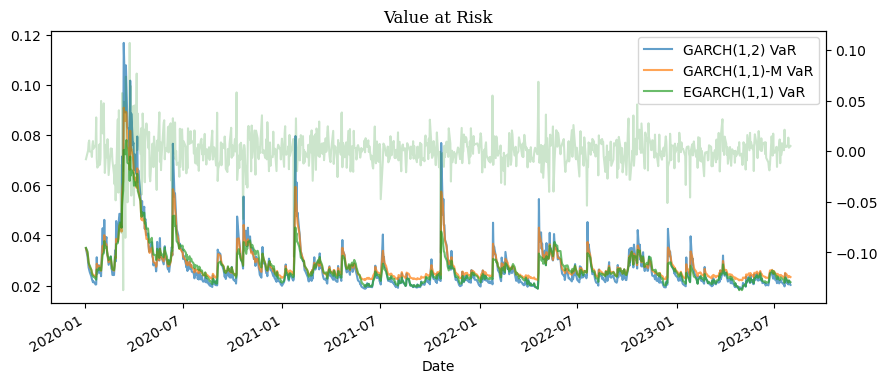

In [12]:
fig, ax = plt.subplots(figsize = (10, 4))
ret.plot(secondary_y = True, c = 'g', alpha = 0.2, label = 'Return', ax = ax)
garch_var.plot(alpha = 0.7, label = 'GARCH(1,2) VaR', ax = ax)
garchm_var.plot(alpha = 0.7, label = 'GARCH(1,1)-M VaR', ax = ax)
egarch_var.plot(alpha = 0.7, label = 'EGARCH(1,1) VaR', ax = ax)
ax.legend()
plt.title('Value at Risk', fontfamily = 'Serif', fontsize = 12)
plt.show()

#### 4. Stochastic Volatility Model

IBM 수익률 벡터에 대해서 Stochastic Volatility Model을 추정하라. 추정을 위해 아래의 함수를 사용하면 된다. $\nu = 0.1$, step size = 10이고 random seed = 42로 지정하여라

**4.1 Monte Carlo Simulation**

prior distribution은 500개를 추정하였을 때, monte carlo simulation으로 추정된 IBM return의 확률보행 경로를 출력하라

In [13]:
import os
import arviz as az
import pymc as pm

def StochasticVolatilityModel(data, stepsize : int , nu : float):
    with pm.Model(coords = {"time": data.index.values}) as model:
        step_size = pm.Exponential("step_size", stepsize)
        volatility = pm.GaussianRandomWalk("volatility", sigma = step_size, dims = "time")
        nu = pm.Exponential("nu", nu)
        returns = pm.StudentT("returns", nu = nu, lam = np.exp(-2 * volatility), observed = data, dims = "time")
    return model

In [14]:
rng = np.random.default_rng(42)

SVmodel = StochasticVolatilityModel(ret, stepsize = 10, nu = 0.1)

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/pymc/distributions/timeseries.py:293: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(


In [16]:
with SVmodel:
    idata = pm.sample_prior_predictive(500, random_seed = rng)

prior_predictive = az.extract(idata, group = "prior_predictive")

Sampling: [nu, returns, step_size, volatility]


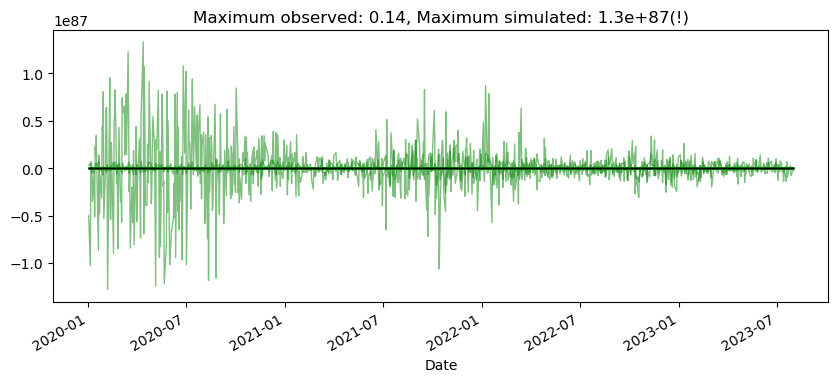

In [17]:
fig, ax = plt.subplots(figsize = (10, 4))
ret.plot(ax = ax, lw = 1, color = "black")
res = pd.DataFrame(prior_predictive["returns"][:, 0::10].values)
res.index = ret.index
ax.plot(res, "g", alpha = 0.5, lw = 1, zorder = -10)

max_observed, max_simulated = np.max(np.abs(ret)), np.max(np.abs(res))
ax.set_title(f"Maximum observed: {max_observed:.2g}, Maximum simulated: {max_simulated:.2g}(!)");

In [18]:
with SVmodel :
    idata.extend(pm.sample(random_seed = rng))

posterior = az.extract(idata)
posterior["exp_volatility"] = np.exp(posterior["volatility"])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [step_size, volatility, nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 61 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [19]:
with SVmodel:
    idata.extend(pm.sample_posterior_predictive(idata, random_seed = rng))

posterior_predictive = az.extract(idata, group = "posterior_predictive")

Sampling: [returns]


array([[<Axes: title={'center': 'step_size'}>,
        <Axes: title={'center': 'step_size'}>],
       [<Axes: title={'center': 'nu'}>, <Axes: title={'center': 'nu'}>]],
      dtype=object)

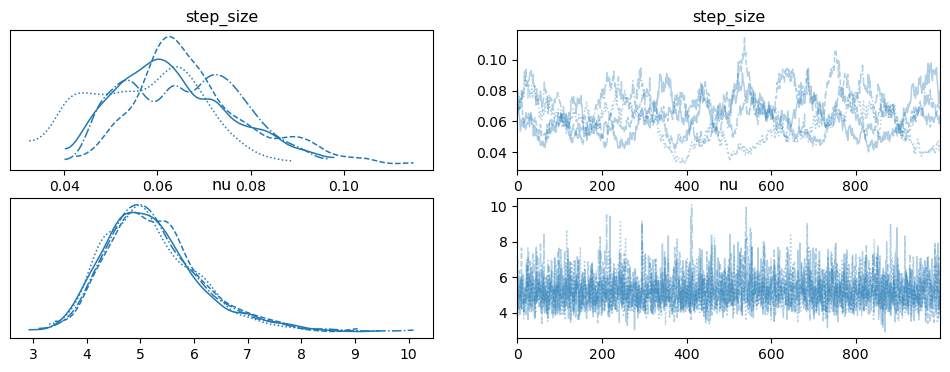

In [20]:
az.plot_trace(idata, var_names = ["step_size", "nu"])

<Axes: xlabel='Date'>

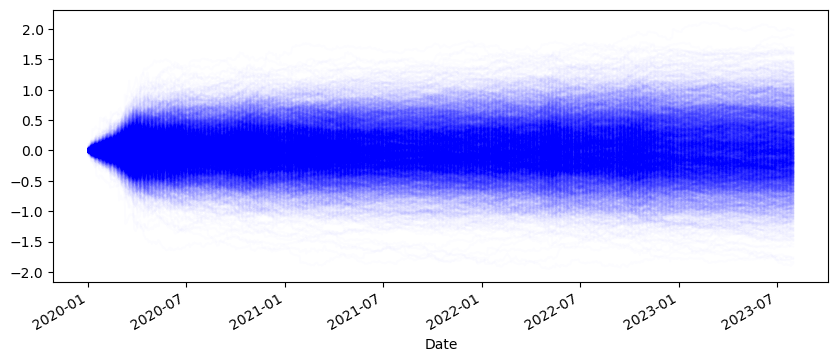

In [21]:
ret_prior = pd.DataFrame(posterior_predictive['returns'], index = ret.index)
ret_prior.cumsum().plot(alpha = 0.01, legend = False, color = 'b', figsize = (10, 4))

posterior return의 monte carlo 확률보행과정은 위와 같은 방법으로 plotting할 수 있다

**4.2 SV model**

Stochastic Volatility 모형을 이용하여 변동성을 추정하고 plotting하여라

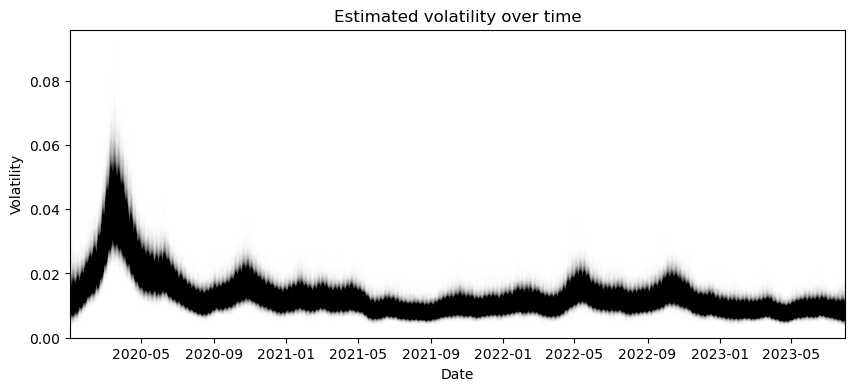

In [22]:
fig, ax = plt.subplots(figsize = (10, 4))

y_vals = posterior["exp_volatility"]
x_vals = y_vals.time.astype(np.datetime64)

plt.plot(x_vals, y_vals, "k", alpha = 0.002)
ax.set_xlim(x_vals.min(), x_vals.max())
ax.set_ylim(bottom = 0)
ax.set(title = "Estimated volatility over time", xlabel = "Date", ylabel = "Volatility");

Text(0.5, 1.0, 'Posterior volatility')

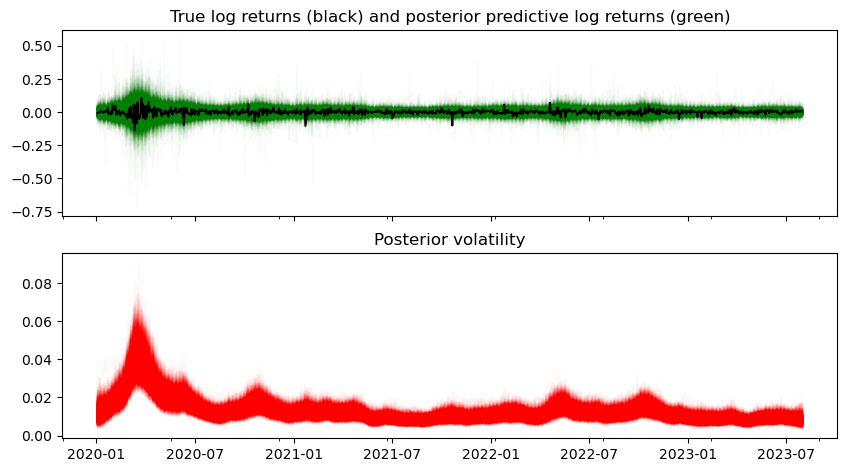

In [23]:
fig, axes = plt.subplots(nrows = 2, figsize = (10, 6), sharex = True)
ret.plot(ax=axes[0], color="black")

axes[1].plot(pd.DataFrame(posterior["exp_volatility"], index = ret.index), "r", alpha = 0.02)
axes[0].plot(pd.DataFrame(posterior_predictive["returns"], index = ret.index), "g", alpha = 0.02, zorder = -10)
axes[0].set_title("True log returns (black) and posterior predictive log returns (green)")
axes[1].set_title("Posterior volatility")

**4.3 GARCH and VaR**

Exercise 2에서 추정한 $\mathrm{GARCH}$모형과 비교하라. $\mathrm{GARCH}$으로 추정한 $\mathrm{VaR}$과 SV model로 추정한 $\mathrm{VaR}$을 비교하라. 차이가 있는가? 있다면 그 이유는 무엇인가? 단, 신뢰구간은 95%로 추정한다

(SV model에서 $\mathrm{VaR}$을 추정할 때 중앙값을 사용해도 무관하다)

Text(0.5, 1.0, 'GARCH(1,2) versus SV model')

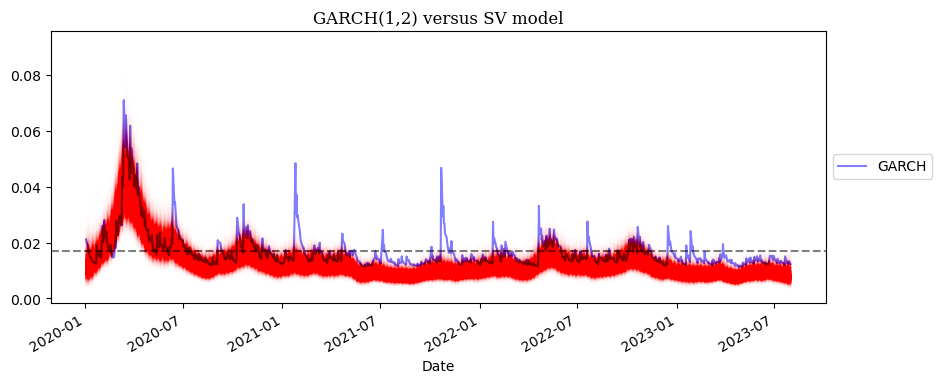

In [24]:
result2.conditional_volatility.plot(figsize = (10, 4), label = 'GARCH', color = 'b', alpha = 0.5)
plt.axhline(result2.conditional_volatility.mean(),
            color = 'k', linestyle = '--', alpha = 0.5)
plt.plot(x_vals, y_vals, "r", alpha = 0.002)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GARCH(1,2) versus SV model', fontfamily = 'Serif', fontsize = 12)

Text(0.5, 1.0, 'GARCH(1,2) VaR versus SV model VaR')

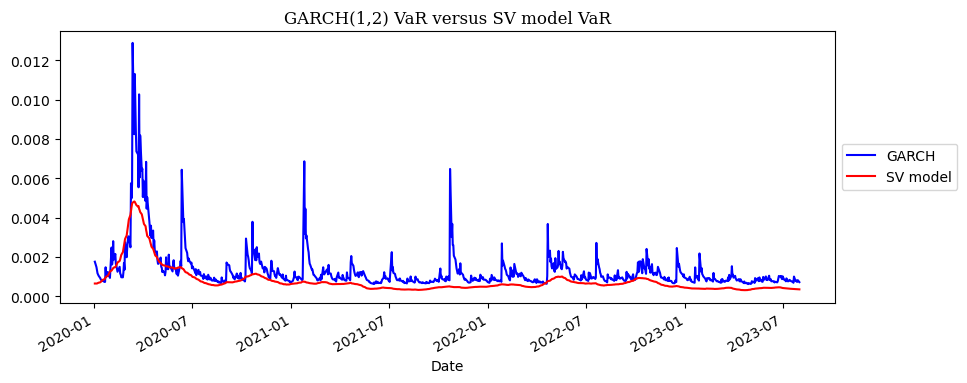

In [25]:
(result2.conditional_volatility ** 1.645).plot(figsize = (10, 4), label = 'GARCH', color = 'b')
(pd.DataFrame(y_vals, index = ret.index) ** 1.645).median(axis = 1).plot(label = 'SV model', color = 'r')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GARCH(1,2) VaR versus SV model VaR', fontfamily = 'Serif', fontsize = 12)

#### 5. Becker-Parkinson Volatility

IBM 수익률 벡터를 이용하여 Becker-Parkinson Range Volatility를 추정하여라

**5.1 Corwin & Schultz Spread**

IBM 가격 데이터 행렬과 아래 함수를 활용하여 Corwin & Schultz spread를 추정하라

In [26]:
def getBeta(series : pd.DataFrame, sl : int) :
    h1 = series[['High','Low']].values
    h1 = np.log(h1[:,0]/h1[:,1])**2
    h1 = pd.Series(h1, index = series.index)
    beta = h1.rolling(window = 2).sum()
    beta = beta.rolling(window = sl).mean()
    beta = beta.replace([np.inf, -np.inf], np.nan)
    return beta.dropna()

def getGamma(series : pd.DataFrame) :
    h2 = series['High'].rolling(window=2).max()
    l2 = series['Low'].rolling(window=2).min()
    gamma = np.log(h2.values/l2.values)**2
    gamma = pd.Series(gamma, index = h2.index)
    gamma = gamma.replace([np.inf, -np.inf], np.nan)
    return gamma.dropna()

def getAlpha(beta, gamma) :
    alpha = ((np.sqrt(2 * beta) - np.sqrt(beta)) /(3 - (2 * np.sqrt(2)))) - np.sqrt(gamma / (3 - (2 * np.sqrt(2))))
    alpha[alpha<0] = 0
    return alpha.dropna()

def corwinSchultz(series, sl : int = 1) :
    beta = getBeta(series, sl)
    gamma = getGamma(series)
    alpha = getAlpha(beta, gamma)
    spread = 2 * np.exp(alpha - 1)/(1 + np.exp(alpha))
    startTime = pd.Series(series.index[0 : spread.shape[0]], index = spread.index)
    spread = pd.concat([spread,startTime], axis = 1)
    spread.columns = ['Spread', 'Start_time']
    return spread

def getSigma(beta, gamma) :
    k2 = (8/np.pi)**.5
    den = 3-2*2**.5
    sigma = (2**-.5-1)*beta**.5/(k2*den)
    sigma += (gamma/(k2**2*den))**.5
    sigma[sigma<0] = 0
    return sigma

In [27]:
corwinschultz_spread = corwinSchultz(ibm, sl = 1)
corwinschultz_spread

,Spread,Start_time
Date,,
2020-01-03,0.367879,2020-01-02
2020-01-06,0.367896,2020-01-03
2020-01-07,0.368262,2020-01-06
2020-01-08,0.367978,2020-01-07
2020-01-09,0.367879,2020-01-08
...,...,...
2023-07-25,0.368773,2023-07-24
2023-07-26,0.367879,2023-07-25
2023-07-27,0.367879,2023-07-26


**5.2 Becker-Parkinson Volatility**

**5.1번**에서 스프레드를 구하는데 활용한 $\alpha, \beta$를 활용하여 Becker-Parkinson range volatility를 추정하라

In [29]:
becker_parkinson = getSigma(getBeta(ibm, 1), getGamma(ibm))
becker_parkinson

Date
2020-01-03    0.012715
2020-01-06    0.005449
2020-01-07    0.004895
2020-01-08    0.007860
2020-01-09    0.012788
                ...   
2023-07-25    0.003085
2023-07-26    0.008960
2023-07-27    0.022160
2023-07-28    0.007896
2023-07-31    0.006999
Length: 899, dtype: float64

<Axes: title={'center': 'Becker Parkinson Volatility Estimator'}, xlabel='Date'>

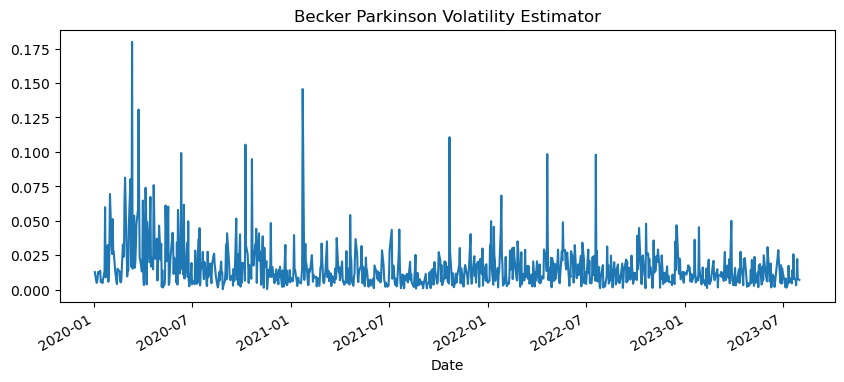

In [30]:
becker_parkinson.plot(figsize = (10,4), title = 'Becker Parkinson Volatility Estimator')

**5.3 Kalman Filter**

<center><img src = "https://machinelearningspace.com/wp-content/uploads/2020/02/kalman15.png" alt="My Image"></center>

Kalman Filter는 본래 공학에서 측정치와 상태 공간 사이의 예측 오차를 줄여나감으로써, 물체의 위치를 추정하는데 쓰이는 알고리즘 필터이다. 경제학에서는 대개 통계량과 실제수준과의 괴리감을 줄이고 시장의 기대치 혹은 상태공간을 추정하는데 사용되며, 다음과 같은 과정을 거친다

$$v_t = y_t - \mu_{t|t-1}$$
$$V_t = \Sigma_{t|t-1} + \sigma_e^2$$
$$K_t = \frac{\Sigma_{t|t-1}}{V_t}$$
$$\mu_{t+1|t} = \mu_{t|t-1} + K_t v_t$$
$$\Sigma_{t+1|t} = \Sigma_{t|t-1}(1 - K_t) + \sigma_\eta^2$$

$K_t$는 Kalman Filter 과정에서 얻는 효과이며, Kalman Gain이라고 한다. Kalman Filter를 통해 측정치의 잠재 상태인 **상태공간(State Space)** 을 추정할 수 있으며, 평활화 및 노이즈를 제거할 때에도 사용되고, 최근에는 Machine Learning의 Feature Preprocessing 과정에 주로 사용된다

**5.2번**에서 추정한 Becker-Parkinson Range Volatility에 Kalman Filter를 적용하면 시장의 내재 변동성을 추정할 수 있다. 아래의 Class를 활용하여 IBM return 벡터의 Becker-Parkinson 내재 변동성을 추정하고 $\mathrm{GARCH}$모형의 변동성과 비교하라. 어떤 차이가 존재하는가?

In [31]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import statsmodels.api as sm
class LocalLinearTrend(sm.tsa.statespace.MLEModel):
    def __init__(self, endog):
        # Model order
        k_states = k_posdef = 2
        # Initialize the statespace
        super(LocalLinearTrend, self).__init__(
            endog, k_states=k_states, k_posdef=k_posdef,
            initialization="approximate_diffuse",
            loglikelihood_burn=k_states
        )
        # Initialize the matrices
        self.ssm['design'] = np.array([1, 0])
        self.ssm['transition'] = np.array([[1, 1],
                                           [0, 1]])
        self.ssm['selection'] = np.eye(k_states)
        # Cache some indices
        self._state_cov_idx = ("state_cov",) + np.diag_indices(k_posdef)

    @property
    def param_names(self):
        return ["sigma2.measurement", "sigma2.level", "sigma2.trend"]

    @property
    def start_params(self):
        return [np.std(self.endog)]*3

    def transform_params(self, unconstrained):
        return unconstrained ** 2

    def untransform_params(self, constrained):
        return constrained ** 0.5

    def update(self, params, *args, **kwargs):
        params = super(LocalLinearTrend, self).update(params, *args, **kwargs)
        # Observation covariance
        self.ssm['obs_cov',0,0] = params[0]
        # State covariance
        self.ssm[self._state_cov_idx] = params[1:]

In [32]:
model = LocalLinearTrend(becker_parkinson)
result = model.fit(disp = True)

print(result.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.64204D-01    |proj g|=  3.56008D+00

At iterate    1    f= -1.55108D+00    |proj g|=  1.12850D+01

At iterate    2    f= -1.60749D+00    |proj g|=  1.15757D+01
  ys=-1.445E-03  -gs= 4.837E-02 BFGS update SKIPPED

At iterate    3    f= -1.60813D+00    |proj g|=  1.15791D+01

At iterate    4    f= -2.25395D+00    |proj g|=  1.80804D+01

At iterate    5    f= -2.51871D+00    |proj g|=  2.93897D+01

At iterate    6    f= -2.67637D+00    |proj g|=  1.11776D+02

At iterate    7    f= -2.69635D+00    |proj g|=  1.59760D+02

At iterate    8    f= -2.70140D+00    |proj g|=  1.20510D+01

At iterate    9    f= -2.70609D+00    |proj g|=  1.94300D+02

At iterate   10    f= -2.70766D+00    |proj g|=  1.18277D+02

At iterate   11    f= -2.70793D+00    |proj g|=  6.41982D+01

At iterate   12    f= -2.70954D+00  

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


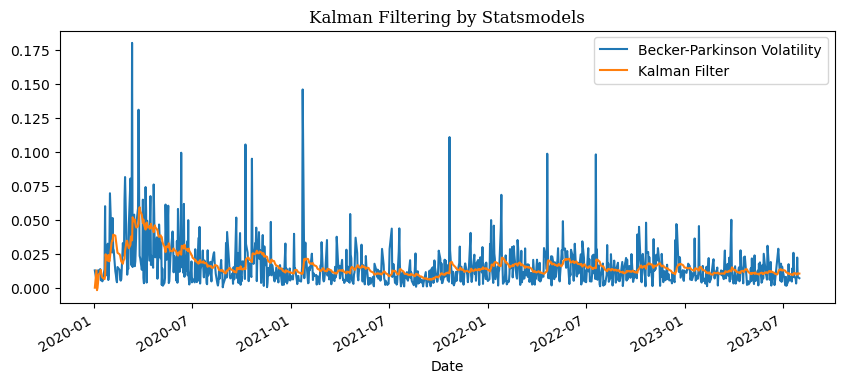

In [33]:
predict = result.get_prediction()
plotting = pd.DataFrame({"Becker-Parkinson Volatility": becker_parkinson,
                      "Kalman Filter": predict.predicted_mean})
plotting.plot(figsize = (10, 4))
plt.title("Kalman Filtering by Statsmodels", fontfamily = 'Serif', fontsize = 12)
plt.show()

Text(0.5, 1.0, 'GARCH(1,2) versus Kalman Filtered BP Volatility')

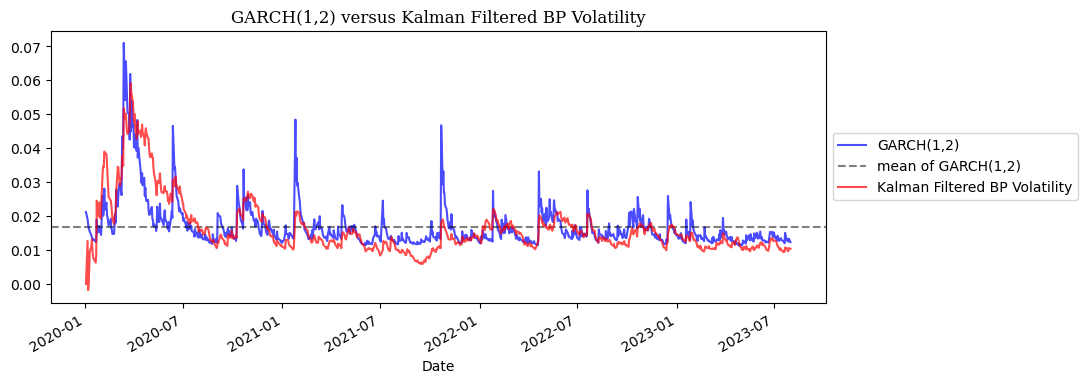

In [34]:
result2.conditional_volatility.plot(figsize = (10, 4), label = 'GARCH(1,2)', color = 'b', alpha = 0.7)
plt.axhline(result2.conditional_volatility.mean(),
            color = 'k', linestyle = '--', alpha = 0.5, label = 'mean of GARCH(1,2)')
plt.plot(predict.predicted_mean, "r", alpha = 0.7, label = 'Kalman Filtered BP Volatility')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GARCH(1,2) versus Kalman Filtered BP Volatility', fontfamily = 'Serif', fontsize = 12)

저가-고가 스프레드 추정량인 Becker-Parkinson Volatility를 Kalman Filtering한 내재 변동성과 $\mathrm{GARCH}$모형을 통해 추정한 변동성이 큰 차이가 나지 않는다. 즉, spread값을 통해 내재변동성을 추정하는 것은 유효한 방법이며, 오히려 장중 시장의 현금흐름에 대한 정보를 추가할 수 있기 때문에 강력한 Feature로 사용될 수 있다

#### 6. Exponential Weighted oving Average Volatility

변동성을 추정하는 방법은 여러가지가 있지만 그중 지수가중이동평균 변동성(EWMA Volatility)는 계산이 편하고 빠르다는 장점 덕분에 근사값으로 널리 사용되고 있다. 또한, 동적으로 변동성을 추정할 수 있다는 장점도 가지고 있다

EWMA 변동성은 다음과 같이 계산된다

$$\mathrm{EWMA}_t = \lambda r_t + (1-\lambda)\mathrm{EWMA}_{t-1}$$

아래 함수는 일별 변동성을 가중이동평균하여 구하는 함수이다. `span`은 가중이동평균할 기간을 의미하며, 보통 10일을 기준으로 한다

IBM 수익률 시계열에 대하여 10일 가중이동평균 변동성을 구하고 적절한 방법으로 시각화하라. **2.1번**에서 추정한 $\mathrm{GARCH}$ 변동성과 비교하라. EWMA 변동성은 $\mathrm{GARCH}$의 추정치 대신 사용 가능한 지표인가?

In [35]:
def getDailyVolatility(close : pd.Series, span : int = 10):
    df0 = close.index.searchsorted(close.index - pd.Timedelta(days=1))
    df0 = df0[df0 > 0]
    df0 = (pd.Series(close.index[df0 - 1],
                     index=close.index[close.shape[0] - df0.shape[0]:]))
    try:
        df0 = close.loc[df0.index] / close.loc[df0.values].values - 1  
    except Exception as e:
        print(f'error: {e}\nplease confirm no duplicate indices')
    df0 = df0.ewm(span = span).std().rename('dailyVol')
    return df0

In [36]:
ewma = getDailyVolatility(ibm.Close, span = 10).dropna()
ewma

Date
2020-01-07    0.000474
2020-01-08    0.006320
2020-01-09    0.010135
2020-01-10    0.008367
2020-01-13    0.008407
                ...   
2023-07-25    0.010419
2023-07-26    0.009429
2023-07-27    0.009192
2023-07-28    0.008556
2023-07-31    0.008352
Name: dailyVol, Length: 897, dtype: float64

Text(0.5, 1.0, 'GARCH(1,2) versus EWMA(10)')

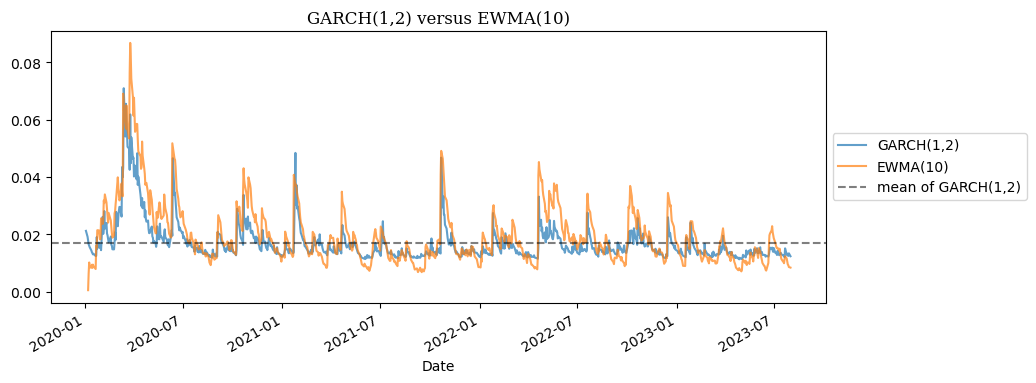

In [37]:
result2.conditional_volatility.plot(figsize = (10, 4), label = 'GARCH(1,2)', alpha = 0.7)
ewma.plot(label = 'EWMA(10)', alpha = 0.7)
plt.axhline(result2.conditional_volatility.mean(),
            color = 'k', linestyle = '--', alpha = 0.5, label = 'mean of GARCH(1,2)')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GARCH(1,2) versus EWMA(10)', fontfamily = 'Serif', fontsize = 12)